In [29]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import torch
from torch import nn
import torch.optim as optim

In [4]:
#https://www.kaggle.com/datasets/clovisdalmolinvieira/brazilian-payment-methods?resource=download
df = pd.read_csv('/content/brazilian_payment_methods.csv')
df

,YearMonth,quantityPix,valuePix,quantityTED,valueTED,quantityTEC,valueTEC,quantityBankCheck,valueBankCheck,quantityBrazilianBoletoPayment,valueBrazilianBoletoPayment,quantityDOC,valueDOC
0,202405,5228826.97,2137205.79,69023.11,3482036.97,0.00,0.00,10467.85,40133.55,349180.92,506302.82,0.00,0.00
1,202404,4924681.00,2083746.68,70647.15,3652606.48,0.00,0.00,11179.22,43295.40,361633.28,524619.69,0.00,0.00
2,202403,4903392.34,1936188.21,67565.05,3333054.27,0.00,0.00,10122.46,36644.55,336435.46,469047.59,0.00,0.00
3,202402,4367133.78,1718217.65,65805.87,2981226.45,60.01,109.32,10373.38,37076.26,332269.47,463066.01,61.89,34.21
4,202401,4371541.99,1818473.97,70343.25,3337344.85,387.18,815.94,11919.12,41615.89,363550.32,516702.44,600.76,616.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,201605,0.00,0.00,38397.79,1284857.76,658.08,1242.92,49391.10,85525.27,210245.33,243361.74,15222.38,12172.78
97,201604,0.00,0.00,36144.63,1284108.75,586.71,1029.40,45938.34,79444.79,195789.71,226725.92,14376.42,11632.65
98,201603,0.00,0.00,37762.98,1387738.67,666.89,1250.64,50443.05,85203.32,207938.76,239690.04,15322.97,12303.86
99,201602,0.00,0.00,33986.29,1184928.57,576.42,1079.27,46957.82,79927.23,197575.71,225107.82,14455.60,11778.74


In [7]:
df.columns

Index(['YearMonth', 'quantityPix', 'valuePix', 'quantityTED', 'valueTED',
       'quantityTEC', 'valueTEC', 'quantityBankCheck', 'valueBankCheck',
       'quantityBrazilianBoletoPayment', 'valueBrazilianBoletoPayment',
       'quantityDOC', 'valueDOC'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   YearMonth                       101 non-null    int64  
 1   quantityPix                     101 non-null    float64
 2   valuePix                        101 non-null    float64
 3   quantityTED                     101 non-null    float64
 4   valueTED                        101 non-null    float64
 5   quantityTEC                     101 non-null    float64
 6   valueTEC                        101 non-null    float64
 7   quantityBankCheck               101 non-null    float64
 8   valueBankCheck                  101 non-null    float64
 9   quantityBrazilianBoletoPayment  101 non-null    float64
 10  valueBrazilianBoletoPayment     101 non-null    float64
 11  quantityDOC                     101 non-null    float64
 12  valueDOC                        101 

In [6]:
df.describe()

,YearMonth,quantityPix,valuePix,quantityTED,valueTED,quantityTEC,valueTEC,quantityBankCheck,valueBankCheck,quantityBrazilianBoletoPayment,valueBrazilianBoletoPayment,quantityDOC,valueDOC
count,101.000000,1.010000e+02,1.010000e+02,101.000000,1.010000e+02,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,201978.603960,9.822789e+05,4.269130e+05,80893.674455,2.341740e+06,728.673366,1494.043069,26852.919802,60465.365050,281402.188218,344113.619901,12522.199208,9539.631485
std,244.716533,1.506205e+06,6.221059e+05,35956.902905,8.655333e+05,229.288284,449.479457,11964.408858,13305.203291,64675.376751,99628.427137,7118.742203,4964.024293
min,201601.000000,0.000000e+00,0.000000e+00,30728.990000,1.101077e+06,0.000000,0.000000,10122.460000,36644.550000,174654.920000,196068.110000,0.000000,0.000000
25%,201802.000000,0.000000e+00,0.000000e+00,55697.340000,1.494125e+06,657.190000,1388.890000,16195.580000,49988.270000,216230.670000,253446.630000,5253.950000,4725.760000
50%,202003.000000,0.000000e+00,0.000000e+00,74398.370000,2.217642e+06,716.000000,1521.420000,24455.110000,57856.850000,272526.140000,307807.550000,15181.120000,11483.080000
75%,202204.000000,1.664792e+06,7.870177e+05,96520.800000,3.159715e+06,801.690000,1649.090000,36378.220000,72834.730000,348653.580000,443844.710000,17385.410000,13355.080000
max,202405.000000,5.228827e+06,2.137206e+06,193914.690000,3.810325e+06,1305.510000,2757.910000,50443.050000,85525.270000,380679.530000,524619.690000,29095.160000,20513.660000


In [10]:
df['Date'] = pd.to_datetime(df['YearMonth'].astype(str), format='%Y%m')
df = df.sort_values('Date')

In [12]:
fig = px.line(df, x='Date', y=['valuePix', 'valueTED', 'valueTEC', 'valueBankCheck', 'valueBrazilianBoletoPayment', 'valueDOC'],
              title='Transaction Values Over Time by Payment Method')
fig.update_layout(xaxis_title='Date', yaxis_title='Value', legend_title='Payment Method')
fig.show()

In [13]:
fig = px.line(df, x='Date', y=['quantityPix', 'quantityTED', 'quantityTEC', 'quantityBankCheck', 'quantityBrazilianBoletoPayment', 'quantityDOC'],
              title='Transaction Quantities Over Time by Payment Method')
fig.update_layout(xaxis_title='Date', yaxis_title='Quantity', legend_title='Payment Method')
fig.show()

In [14]:
recent_df = df.head(5).copy()
recent_df = recent_df.iloc[::-1]

payment_methods = ['Pix', 'TED', 'TEC', 'BankCheck', 'BrazilianBoletoPayment', 'DOC']
colors = px.colors.qualitative.Plotly

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'domain'}, {'type': 'domain'}]],
                    subplot_titles=['Transaction Quantity Distribution', 'Transaction Value Distribution'])

value_cols = [f'value{method}' for method in payment_methods]
quantity_cols = [f'quantity{method}' for method in payment_methods]

fig.add_trace(go.Pie(labels=payment_methods, values=recent_df[quantity_cols].sum(), name='Quantity'), 1, 1)
fig.add_trace(go.Pie(labels=payment_methods, values=recent_df[value_cols].sum(), name='Value'), 1, 2)

fig.update_layout(title_text='Distribution of Transaction Methods (Last 5 Months)')
fig.show()

In [18]:
fig = make_subplots(rows=len(payment_methods), cols=1,
                   subplot_titles=[f'{method} Transactions: Quantity vs Value' for method in payment_methods])

for i, method in enumerate(payment_methods):
    fig.add_trace(
        go.Scatter(x=df['Date'], y=df[f'quantity{method}'], name=f'{method} Quantity', mode='lines'),
        row=i+1, col=1
    )

    fig.add_trace(
        go.Scatter(x=df['Date'], y=df[f'value{method}'], name=f'{method} Value', mode='lines',
                  yaxis='y2'),
        row=i+1, col=1
    )

    fig.update_yaxes(title_text='Quantity', row=i+1, col=1)
    fig.update_yaxes(title_text='Value', overlaying='y', side='right', row=i+1, col=1)

fig.update_layout(height=300*len(payment_methods), title_text='Quantity vs Value for Each Payment Method')
fig.show()

In [21]:
ratio_df = pd.DataFrame(index=payment_methods)

for method in payment_methods:
    value_col = f'value{method}'
    quantity_col = f'quantity{method}'

    total_value = df[value_col].sum()
    total_quantity = df[quantity_col].sum()

    if total_quantity > 0:
        ratio = total_value / total_quantity
    else:
        ratio = 0

    ratio_df.loc[method, 'Avg Transaction Value'] = ratio

fig = px.bar(ratio_df.reset_index().rename(columns={'index': 'Payment Method'}),
             x='Payment Method', y='Avg Transaction Value',
             title='Average Transaction Value by Payment Method (Log Scale)',
             color='Payment Method')

fig.update_layout(xaxis_title='Payment Method',
                  yaxis_title='Average Value per Transaction (log scale)',
                  yaxis_type="log",
                  showlegend=False)
fig.show()

In [24]:
df

,YearMonth,quantityPix,valuePix,quantityTED,valueTED,quantityTEC,valueTEC,quantityBankCheck,valueBankCheck,quantityBrazilianBoletoPayment,valueBrazilianBoletoPayment,quantityDOC,valueDOC,Date,Year,Month
100,201601,0.00,0.00,30728.99,1211165.94,499.31,939.45,45294.31,82800.04,189912.22,222612.29,15709.98,12016.73,2016-01-01,2016,1
99,201602,0.00,0.00,33986.29,1184928.57,576.42,1079.27,46957.82,79927.23,197575.71,225107.82,14455.60,11778.74,2016-02-01,2016,2
98,201603,0.00,0.00,37762.98,1387738.67,666.89,1250.64,50443.05,85203.32,207938.76,239690.04,15322.97,12303.86,2016-03-01,2016,3
97,201604,0.00,0.00,36144.63,1284108.75,586.71,1029.40,45938.34,79444.79,195789.71,226725.92,14376.42,11632.65,2016-04-01,2016,4
96,201605,0.00,0.00,38397.79,1284857.76,658.08,1242.92,49391.10,85525.27,210245.33,243361.74,15222.38,12172.78,2016-05-01,2016,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,202401,4371541.99,1818473.97,70343.25,3337344.85,387.18,815.94,11919.12,41615.89,363550.32,516702.44,600.76,616.58,2024-01-01,2024,1
3,202402,4367133.78,1718217.65,65805.87,2981226.45,60.01,109.32,10373.38,37076.26,332269.47,463066.01,61.89,34.21,2024-02-01,2024,2
2,202403,4903392.34,1936188.21,67565.05,3333054.27,0.00,0.00,10122.46,36644.55,336435.46,469047.59,0.00,0.00,2024-03-01,2024,3
1,202404,4924681.00,2083746.68,70647.15,3652606.48,0.00,0.00,11179.22,43295.40,361633.28,524619.69,0.00,0.00,2024-04-01,2024,4


In [26]:
payment_methods = ['Pix', 'TED', 'TEC', 'BankCheck', 'BrazilianBoletoPayment', 'DOC']

In [27]:
from sklearn.preprocessing import MinMaxScaler

value_cols = [f'value{method}' for method in payment_methods]
quantity_cols = [f'quantity{method}' for method in payment_methods]
feature_cols = quantity_cols + value_cols

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df[feature_cols]),
    columns=feature_cols
)

df_scaled['Date'] = df['Date']

In [44]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 24

scaled_data = df_scaled[feature_cols].values
X, y = create_sequences(scaled_data, seq_length)

X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y)

train_size = int(len(X) * 0.8)
X_train, X_test = X_tensor[:train_size], X_tensor[train_size:]
y_train, y_test = y_tensor[:train_size], y_tensor[train_size:]

In [46]:
class TransactionRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(TransactionRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)

        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, h=None):
        if h is None:
            h = torch.zeros(self.num_layers, x.size(0), self.hidden_size)

        out, h = self.rnn(x, h)

        out = self.fc(out[:, -1, :])
        return out, h

input_size = len(feature_cols)
hidden_size = 128
num_layers = 3
output_size = len(feature_cols)

model = TransactionRNN(input_size, hidden_size, num_layers, output_size)

In [47]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 300
batch_size = 32

# Training loop
train_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for i in range(0, len(X_train), batch_size):
        batch_X = X_train[i:i+batch_size]
        batch_y = y_train[i:i+batch_size]

        outputs, _ = model(batch_X)
        loss = criterion(outputs, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / (len(X_train) // batch_size)
    train_losses.append(epoch_loss)

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

print('Training complete!')

Epoch [10/300], Loss: 0.0369
Epoch [20/300], Loss: 0.0182
Epoch [30/300], Loss: 0.0146
Epoch [40/300], Loss: 0.0130
Epoch [50/300], Loss: 0.0120
Epoch [60/300], Loss: 0.0113
Epoch [70/300], Loss: 0.0111
Epoch [80/300], Loss: 0.0106
Epoch [90/300], Loss: 0.0098
Epoch [100/300], Loss: 0.0091
Epoch [110/300], Loss: 0.0108
Epoch [120/300], Loss: 0.0087
Epoch [130/300], Loss: 0.0073
Epoch [140/300], Loss: 0.0066
Epoch [150/300], Loss: 0.0061
Epoch [160/300], Loss: 0.0056
Epoch [170/300], Loss: 0.0097
Epoch [180/300], Loss: 0.0053
Epoch [190/300], Loss: 0.0046
Epoch [200/300], Loss: 0.0046
Epoch [210/300], Loss: 0.0042
Epoch [220/300], Loss: 0.0034
Epoch [230/300], Loss: 0.0048
Epoch [240/300], Loss: 0.0031
Epoch [250/300], Loss: 0.0027
Epoch [260/300], Loss: 0.0024
Epoch [270/300], Loss: 0.0063
Epoch [280/300], Loss: 0.0025
Epoch [290/300], Loss: 0.0019
Epoch [300/300], Loss: 0.0017
Training complete!


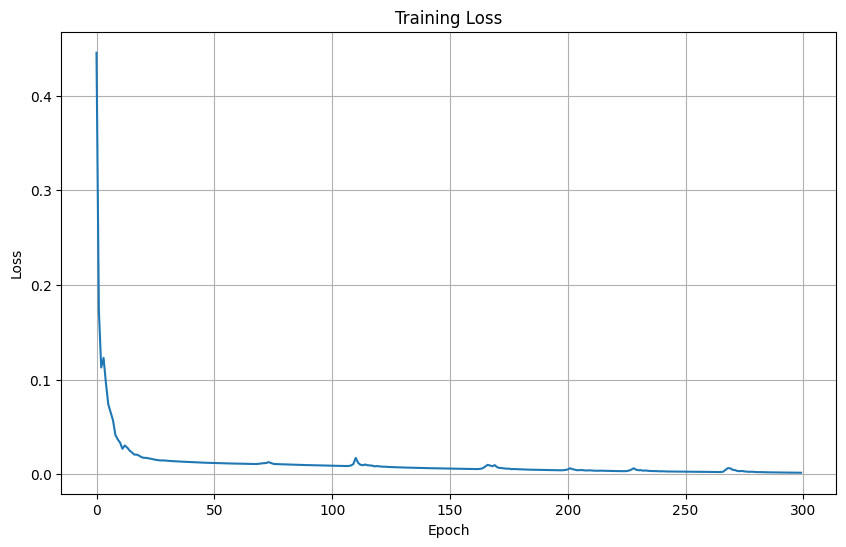

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [51]:
model.eval()
with torch.no_grad():
    test_outputs, _ = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    print(f'Test Loss: {test_loss.item():.4f}')

    test_predictions = scaler.inverse_transform(test_outputs.numpy())
    test_actual = scaler.inverse_transform(y_test.numpy())

Test Loss: 0.0178


In [53]:
def predict_future(model, last_sequence, n_steps, scaler):
    future_predictions = []
    current_sequence = last_sequence.clone()

    model.eval()
    with torch.no_grad():
        for _ in range(n_steps):
            pred, _ = model(current_sequence.unsqueeze(0))

            pred_np = pred.squeeze(0).numpy()
            future_predictions.append(pred_np)

            reshaped_pred = pred.squeeze(0).unsqueeze(0)
            current_sequence = torch.cat((current_sequence[1:], reshaped_pred), dim=0)

    future_predictions = scaler.inverse_transform(np.array(future_predictions))
    return future_predictions

last_sequence = X_tensor[-1]
future_preds = predict_future(model, last_sequence, 6, scaler)

In [57]:
historical_values = df[feature_cols].values
historical_dates = df['Date'].values

historical_df = pd.DataFrame(historical_values, columns=feature_cols)
historical_df['Date'] = historical_dates
historical_df['Type'] = 'Historical'

future_dates = pd.date_range(start=pd.Timestamp(df['Date'].iloc[-1]) + pd.DateOffset(months=1),
                           periods=6, freq='M')

future_df = pd.DataFrame(future_preds, columns=feature_cols)
future_df['Date'] = future_dates
future_df['Type'] = 'Predicted'

prediction_df = pd.concat([historical_df, future_df], ignore_index=True)

<ipython-input-57-47b6a46d9c8f>:13: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [59]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=prediction_df[prediction_df['Type'] == 'Historical']['Date'],
    y=prediction_df[prediction_df['Type'] == 'Historical']['valuePix'],
    mode='lines',
    name='Historical Pix Value',
    line=dict(color='blue')
))

fig.add_trace(go.Scatter(
    x=prediction_df[prediction_df['Type'] == 'Predicted']['Date'],
    y=prediction_df[prediction_df['Type'] == 'Predicted']['valuePix'],
    mode='lines+markers',
    name='Predicted Pix Value',
    line=dict(color='red', dash='dash')
))

fig.update_layout(
    title='Pix Transaction Value: Historical and Predicted',
    xaxis_title='Date',
    yaxis_title='Value (Original Scale)',
    legend_title='Data Type',
    hovermode='x unified'
)

fig.show()

In [60]:
fig = make_subplots(rows=len(payment_methods), cols=2,
                   subplot_titles=[f'{method} Quantity' for method in payment_methods] +
                                 [f'{method} Value' for method in payment_methods],
                   shared_xaxes=True)

for i, method in enumerate(payment_methods):
    fig.add_trace(
        go.Scatter(
            x=prediction_df[prediction_df['Type'] == 'Historical']['Date'],
            y=prediction_df[prediction_df['Type'] == 'Historical'][f'quantity{method}'],
            mode='lines',
            name=f'Historical {method} Quantity',
            line=dict(color='blue')
        ),
        row=i+1, col=1
    )

    fig.add_trace(
        go.Scatter(
            x=prediction_df[prediction_df['Type'] == 'Predicted']['Date'],
            y=prediction_df[prediction_df['Type'] == 'Predicted'][f'quantity{method}'],
            mode='lines+markers',
            name=f'Predicted {method} Quantity',
            line=dict(color='red', dash='dash')
        ),
        row=i+1, col=1
    )

    fig.add_trace(
        go.Scatter(
            x=prediction_df[prediction_df['Type'] == 'Historical']['Date'],
            y=prediction_df[prediction_df['Type'] == 'Historical'][f'value{method}'],
            mode='lines',
            name=f'Historical {method} Value',
            line=dict(color='blue')
        ),
        row=i+1, col=2
    )

    fig.add_trace(
        go.Scatter(
            x=prediction_df[prediction_df['Type'] == 'Predicted']['Date'],
            y=prediction_df[prediction_df['Type'] == 'Predicted'][f'value{method}'],
            mode='lines+markers',
            name=f'Predicted {method} Value',
            line=dict(color='red', dash='dash')
        ),
        row=i+1, col=2
    )

fig.update_layout(
    height=300*len(payment_methods),
    title_text='Transaction Predictions by Payment Method',
    showlegend=False
)

fig.show()